In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

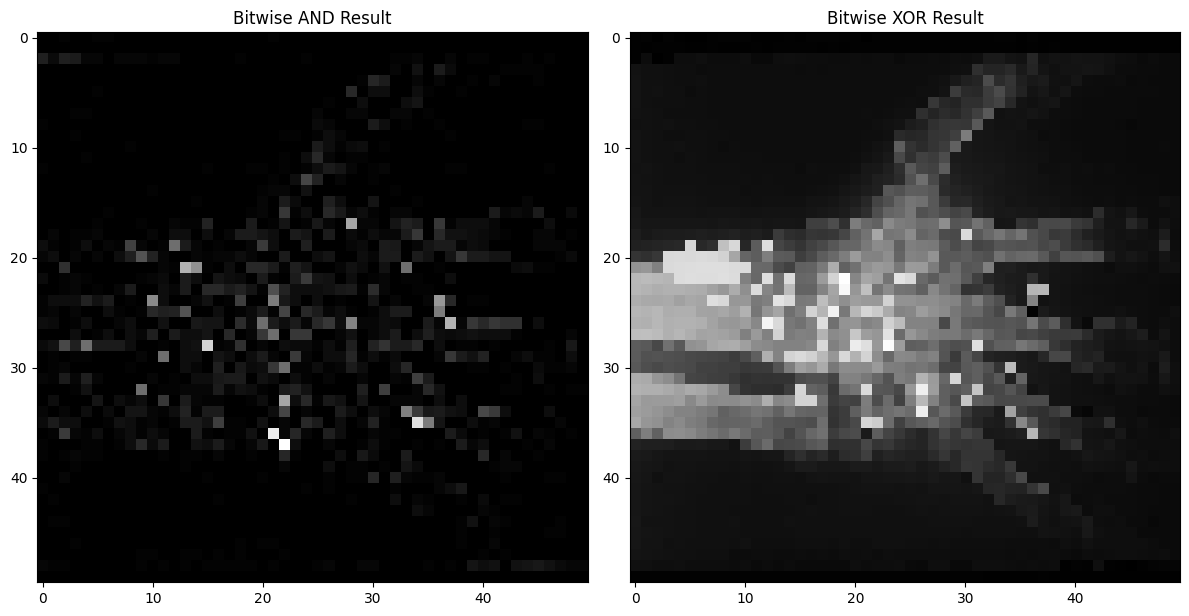

In [2]:
im01 = cv2.imread('shotgun_injury.jpg', cv2.IMREAD_COLOR)

im01_gray = cv2.cvtColor(im01, cv2.COLOR_BGR2GRAY)

kernel = np.ones((3, 3), np.uint8)
im0 = cv2.morphologyEx(im01_gray, cv2.MORPH_OPEN, kernel)

im1 = cv2.morphologyEx(im0, cv2.MORPH_GRADIENT, kernel)

im0_gray = im0
im1_gray = im1

im0_gray_resized = cv2.resize(im0_gray, (50, 50))
im1_gray_resized = cv2.resize(im1_gray, (50, 50))

empty_image = np.zeros((50, 50, 2), dtype=np.uint8)

bitwise_and = cv2.bitwise_and(im0_gray_resized, im1_gray_resized)
bitwise_xor = cv2.bitwise_xor(im0_gray_resized, im1_gray_resized)

empty_image[:, :, 0] = bitwise_and
empty_image[:, :, 1] = bitwise_xor

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(empty_image[:, :, 0], cmap='gray')
plt.title('Bitwise AND Result')

plt.subplot(1, 2, 2)
plt.imshow(empty_image[:, :, 1], cmap='gray')
plt.title('Bitwise XOR Result')

plt.tight_layout()
plt.show()